In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import qutip
import numpy as np
import qutip
import scqubits
from scipy.optimize import minimize
from IPython.display import clear_output

from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.drive import *
from CoupledQuantumSystems.evo import ODEsolve_and_post_process
from CoupledQuantumSystems.noise import *
from CoupledQuantumSystems.qobj_manip import *
from CoupledQuantumSystems.IFQ import gfIFQ

In [2]:
EJ = 4
EC = EJ/2.7
EL = EJ/45

qbt = gfIFQ(EJ = EJ,EC =EC,EL = EL,truncated_dim=13)

t_duration = 50
tlist = np.linspace(0,t_duration,t_duration)
e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(10)]


[2.8352579  2.83236774 0.0936445  0.09987682]


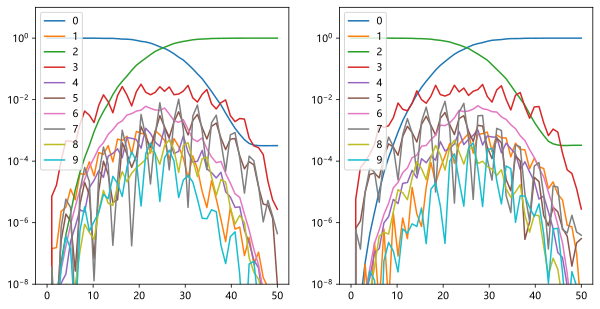

(0.014349908197431621, 0.012604715664849586, 0.00032400222917117194, 0.00033288322200031306)
 Total run time:   0.31s*] Elapsed 0.31s / Remaining 00:00:00:00 [*********56%*          ] Elapsed 0.17s / Remaining 00:00:00:00
 Total run time:   0.31s*] Elapsed 0.31s / Remaining 00:00:00:00


KeyboardInterrupt: 

In [7]:
def objective(x):
    # amp1_scaling_factor = 2.1866024
    # amp2_scaling_factor = 2.14973954
    # amp1_correction_scaling_factor = x[0]
    # amp2_correction_scaling_factor = x[1]
    # detuning1 =x[2]
    # detuning2 =x[3]

    amp1_scaling_factor = x[0]
    amp2_scaling_factor = x[1]
    amp1_correction_scaling_factor = x[2]
    amp2_correction_scaling_factor = x[3]
    detuning1 =0.5
    detuning2 =0.5

    results  = qbt.run_qutip_mesolve_parrallel(
        initial_states = [qutip.basis(qbt.truncated_dim, 0),qutip.basis(qbt.truncated_dim, 2)],
        tlist = tlist,
        drive_terms = qbt.get_Raman_DRAG_drive_terms(
            i = 0,
            j = 3,
            k = 2,
            detuning1=detuning1,
            detuning2 = detuning2,
            t_duration=t_duration,
            shape='sin^2',
            amp_scaling_factor = 1,
            amp1_scaling_factor = amp1_scaling_factor,
            amp2_scaling_factor = amp2_scaling_factor,
            amp1_correction_scaling_factor = amp1_correction_scaling_factor,
            amp2_correction_scaling_factor = amp2_correction_scaling_factor,
        ),
        # c_ops = c_ops,
        e_ops = e_ops
    )
    clear_output()
    print(x)
    fig, axes = plt.subplots(1,2,figsize = (10,5))
    for i, exp in enumerate(results[0].expect):
        axes[0].plot(tlist,exp,label= f"{i}")
    for i, exp in enumerate(results[1].expect):
        axes[1].plot(tlist,exp,label= f"{i}")
    axes[0].legend()
    axes[0].set_yscale('log')
    axes[0].set_ylim(1e-8,1e1)
    axes[1].legend()
    axes[1].set_yscale('log')
    axes[1].set_ylim(1e-8,1e1)
    plt.show()
    
    result0_pop_57 = np.max(np.abs(results[0].expect[5] + results[0].expect[7]))
    result1_pop_57 = np.max(np.abs(results[1].expect[5] + results[1].expect[7]))

    one_minus_pop2 = np.abs( 1- (results[0].expect[2][-1]))
    one_minus_pop0 = np.abs(1- (results[1].expect[0][-1]))

    print((result0_pop_57, result1_pop_57, one_minus_pop2, one_minus_pop0))
    return 0.5* (result0_pop_57 + result1_pop_57) + one_minus_pop2 + one_minus_pop0

initial_guess =[2.7,2.7 ,0.1,0.1]


result = minimize(objective, initial_guess, method='Nelder-Mead')


[1.815396   1.75262409 0.0881651  0.10242305]


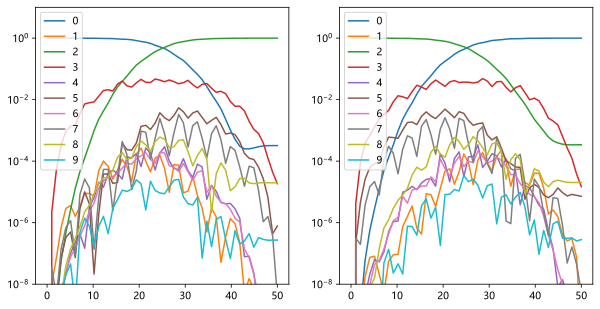

(0.008714451975275832, 0.00750102648293401, 0.0003600990624503808, 0.00038356818488227695)
 Total run time:   0.29s*] Elapsed 0.29s / Remaining 00:00:00:00
 Total run time:   0.30s*] Elapsed 0.30s / Remaining 00:00:00:00


KeyboardInterrupt: 

In [8]:
def objective(x):
    # amp1_scaling_factor = 2.1866024
    # amp2_scaling_factor = 2.14973954
    # amp1_correction_scaling_factor = x[0]
    # amp2_correction_scaling_factor = x[1]
    # detuning1 =x[2]
    # detuning2 =x[3]

    amp1_scaling_factor = x[0]
    amp2_scaling_factor = x[1]
    amp1_correction_scaling_factor = x[2]
    amp2_correction_scaling_factor = x[3]
    detuning1 =0.2
    detuning2 =0.2

    results  = qbt.run_qutip_mesolve_parrallel(
        initial_states = [qutip.basis(qbt.truncated_dim, 0),qutip.basis(qbt.truncated_dim, 2)],
        tlist = tlist,
        drive_terms = qbt.get_Raman_DRAG_drive_terms(
            i = 0,
            j = 3,
            k = 2,
            detuning1=detuning1,
            detuning2 = detuning2,
            t_duration=t_duration,
            shape='sin^2',
            amp_scaling_factor = 1,
            amp1_scaling_factor = amp1_scaling_factor,
            amp2_scaling_factor = amp2_scaling_factor,
            amp1_correction_scaling_factor = amp1_correction_scaling_factor,
            amp2_correction_scaling_factor = amp2_correction_scaling_factor,
        ),
        # c_ops = c_ops,
        e_ops = e_ops
    )
    clear_output()
    print(x)
    fig, axes = plt.subplots(1,2,figsize = (10,5))
    for i, exp in enumerate(results[0].expect):
        axes[0].plot(tlist,exp,label= f"{i}")
    for i, exp in enumerate(results[1].expect):
        axes[1].plot(tlist,exp,label= f"{i}")
    axes[0].legend()
    axes[0].set_yscale('log')
    axes[0].set_ylim(1e-8,1e1)
    axes[1].legend()
    axes[1].set_yscale('log')
    axes[1].set_ylim(1e-8,1e1)
    plt.show()
    
    result0_pop_57 = np.max(np.abs(results[0].expect[5] + results[0].expect[7]))
    result1_pop_57 = np.max(np.abs(results[1].expect[5] + results[1].expect[7]))

    one_minus_pop2 = np.abs( 1- (results[0].expect[2][-1]))
    one_minus_pop0 = np.abs(1- (results[1].expect[0][-1]))

    print((result0_pop_57, result1_pop_57, one_minus_pop2, one_minus_pop0))
    return 0.5* (result0_pop_57 + result1_pop_57) + one_minus_pop2 + one_minus_pop0

initial_guess =[1.7,1.7 ,0.1,0.1]


result = minimize(objective, initial_guess, method='Nelder-Mead')


[1.30489638 1.30253745 0.07079778 0.09271019]


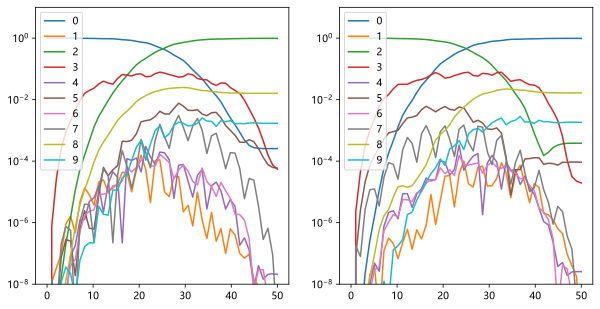

(0.010727949478423848, 0.007502305321593388, 0.018117175898672233, 0.018871088205958397)
 Total run time:   0.32s*] Elapsed 0.32s / Remaining 00:00:00:00 [*********40%           ] Elapsed 0.11s / Remaining 00:00:00:00
 Total run time:   0.33s*] Elapsed 0.33s / Remaining 00:00:00:00


KeyboardInterrupt: 

In [10]:
def objective(x):
    # amp1_scaling_factor = 2.1866024
    # amp2_scaling_factor = 2.14973954
    # amp1_correction_scaling_factor = x[0]
    # amp2_correction_scaling_factor = x[1]
    # detuning1 =x[2]
    # detuning2 =x[3]

    amp1_scaling_factor = x[0]
    amp2_scaling_factor = x[1]
    amp1_correction_scaling_factor = x[2]
    amp2_correction_scaling_factor = x[3]
    detuning1 =0.1
    detuning2 =0.1

    results  = qbt.run_qutip_mesolve_parrallel(
        initial_states = [qutip.basis(qbt.truncated_dim, 0),qutip.basis(qbt.truncated_dim, 2)],
        tlist = tlist,
        drive_terms = qbt.get_Raman_DRAG_drive_terms(
            i = 0,
            j = 3,
            k = 2,
            detuning1=detuning1,
            detuning2 = detuning2,
            t_duration=t_duration,
            shape='sin^2',
            amp_scaling_factor = 1,
            amp1_scaling_factor = amp1_scaling_factor,
            amp2_scaling_factor = amp2_scaling_factor,
            amp1_correction_scaling_factor = amp1_correction_scaling_factor,
            amp2_correction_scaling_factor = amp2_correction_scaling_factor,
        ),
        # c_ops = c_ops,
        e_ops = e_ops
    )
    clear_output()
    print(x)
    fig, axes = plt.subplots(1,2,figsize = (10,5))
    for i, exp in enumerate(results[0].expect):
        axes[0].plot(tlist,exp,label= f"{i}")
    for i, exp in enumerate(results[1].expect):
        axes[1].plot(tlist,exp,label= f"{i}")
    axes[0].legend()
    axes[0].set_yscale('log')
    axes[0].set_ylim(1e-8,1e1)
    axes[1].legend()
    axes[1].set_yscale('log')
    axes[1].set_ylim(1e-8,1e1)
    plt.show()
    
    result0_pop_57 = np.max(np.abs(results[0].expect[5] + results[0].expect[7]))
    result1_pop_57 = np.max(np.abs(results[1].expect[5] + results[1].expect[7]))

    one_minus_pop2 = np.abs( 1- (results[0].expect[2][-1]))
    one_minus_pop0 = np.abs(1- (results[1].expect[0][-1]))

    print((result0_pop_57, result1_pop_57, one_minus_pop2, one_minus_pop0))
    return 0.5* (result0_pop_57 + result1_pop_57) + one_minus_pop2 + one_minus_pop0

initial_guess =[1.1,1.1 ,0.1,0.1]


result = minimize(objective, initial_guess, method='Nelder-Mead')
